In [1]:
import scrapy
from  scrapy.http import HtmlResponse
from scrapy import Selector

import requests

            ds      y
0   2023-02-08  10.72
1   2023-02-07  10.68
2   2023-02-06  10.63
3   2023-02-03  10.67
4   2023-02-02  10.62
..         ...    ...
221 2022-03-25  13.18
222 2022-03-24  13.36
223 2022-03-23  13.63
224 2022-03-22  13.22
225 2022-03-21  13.57

[226 rows x 2 columns]


<AxesSubplot:xlabel='ds'>

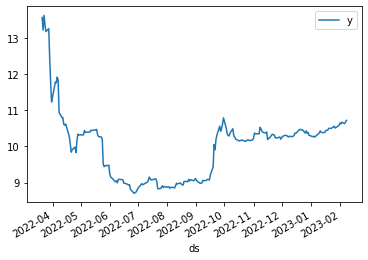

In [2]:
from datetime import datetime

import requests
import pandas as pd
from bs4 import BeautifulSoup

URL = "https://www.cbr.ru/eng/hd_base/zcyc_params/?UniDbQuery.Posted=True&UniDbQuery.From=28.02.2022"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
results = soup.find_all("tr")
#print(results)
data_vals = []
for tr in results[2:]:
    date = datetime.strptime(tr.find_all("td")[0].text, "%d.%m.%Y")
    val = float(tr.find_all("td")[-4].text)
    data_vals.append((date, val))
#print(page.text)
#print(data)
df = pd.DataFrame(data_vals, columns = ['ds','y'])
print(df)
df.plot.line(x='ds', y='y')


10:40:33 - cmdstanpy - INFO - Chain [1] start processing
10:40:33 - cmdstanpy - INFO - Chain [1] done processing


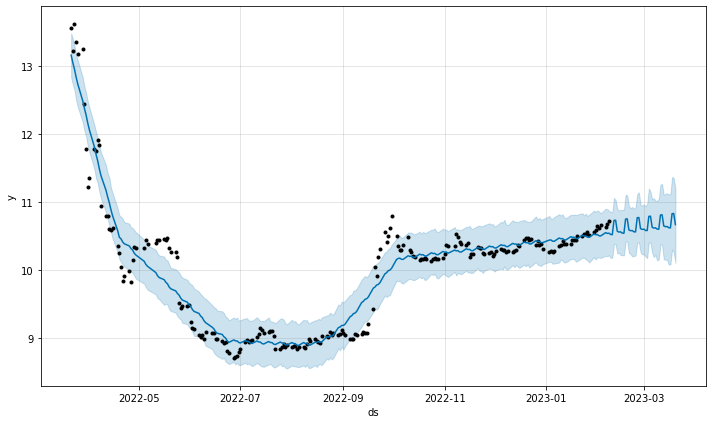

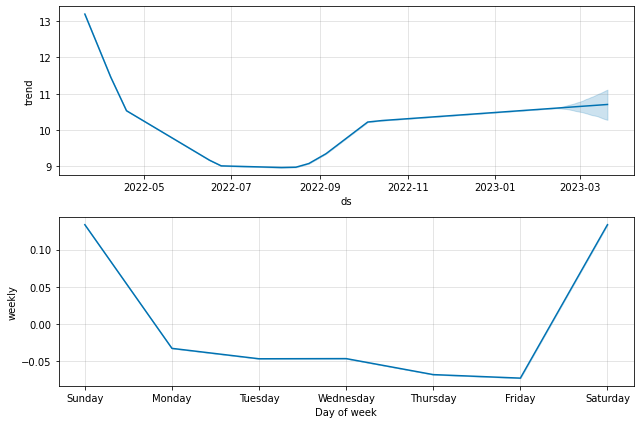

In [5]:
from prophet import Prophet

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=40)
future.tail()
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


In [6]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go
#plot_plotly(m, forecast)
plot_components_plotly(m, forecast)


In [7]:
import plotly.graph_objs as go